# Дормидонтов Михаил 

## Вариант 8

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

2 – линейная регрессия, LASSO регуляризатор;
3 – линейная регрессия, RIDGE регуляризатор;

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
import sklearn as skl
import sklearn as sk
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
label_encoder = LabelEncoder()
scaler = StandardScaler()
figsize=(20,10)

### 1 Задание

1. dateCrawled: дата сканирования.
2. name: название автомобиля.
3. seller: продавец.
4. offerType: тип предложения.
5. price: цена автомобиля.
6. vehicleType: тип кузова.
7. yearOfRegistration: год регистрирации.
8. gearbox: тип коробки передач.
9. powerPS: мощность машины в PS.
10. model: модель автомобиля.
11. kilometer: киллометры.
12. monthOfRegistration: месяц регистрации автомобиля.
13. fuelType: тип топлива.
14. brand: марка.
15. notRepairedDamage: если у автомобиля есть повреждение, которое еще не отремонтировано.
16. dateCreated: дата объявления.
17. nrOfPictures: количество картинок в объявлении.
18. postalCode: почтовый индекс.
19. lastSeenOnline: последнее сканирование.

In [21]:
auto = pd.read_csv("autos.csv", encoding='iso-8859-1')
auto

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [22]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [23]:
auto.dropna(inplace=True)
auto.drop(
    ['dateCrawled', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model','nrOfPictures'],
    axis = 1,
    inplace=True
)
auto

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,privat,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,privat,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,privat,650,test,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,privat,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
7,privat,0,test,limousine,1980,manuell,50,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,privat,3200,control,limousine,2004,manuell,225,150000,5,benzin,seat,ja
371521,privat,1150,control,bus,2000,manuell,0,150000,3,benzin,opel,nein
371524,privat,1199,test,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,privat,9200,test,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein


### 2 Задание

In [24]:
print("До удаления дубликатов: ", auto.shape)
auto.drop_duplicates(keep='first',inplace = True)
print("После удаления: ", auto.shape)

До удаления дубликатов:  (260956, 12)
После удаления:  (246385, 12)


### 3 Задание

In [25]:
numer_columns = [i for i in auto.columns if auto[i].dtype.name != 'object']
print("Numerical: " + str(numer_columns))

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


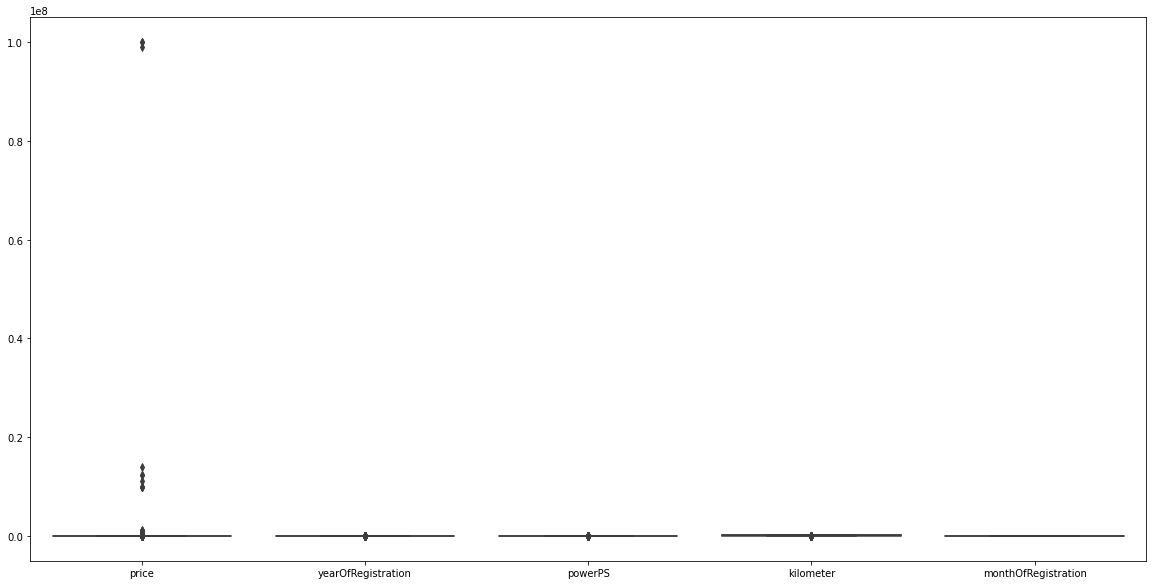

In [26]:
plt.figure(figsize=figsize)
sns.boxplot(data=auto[numer_columns])
plt.show()

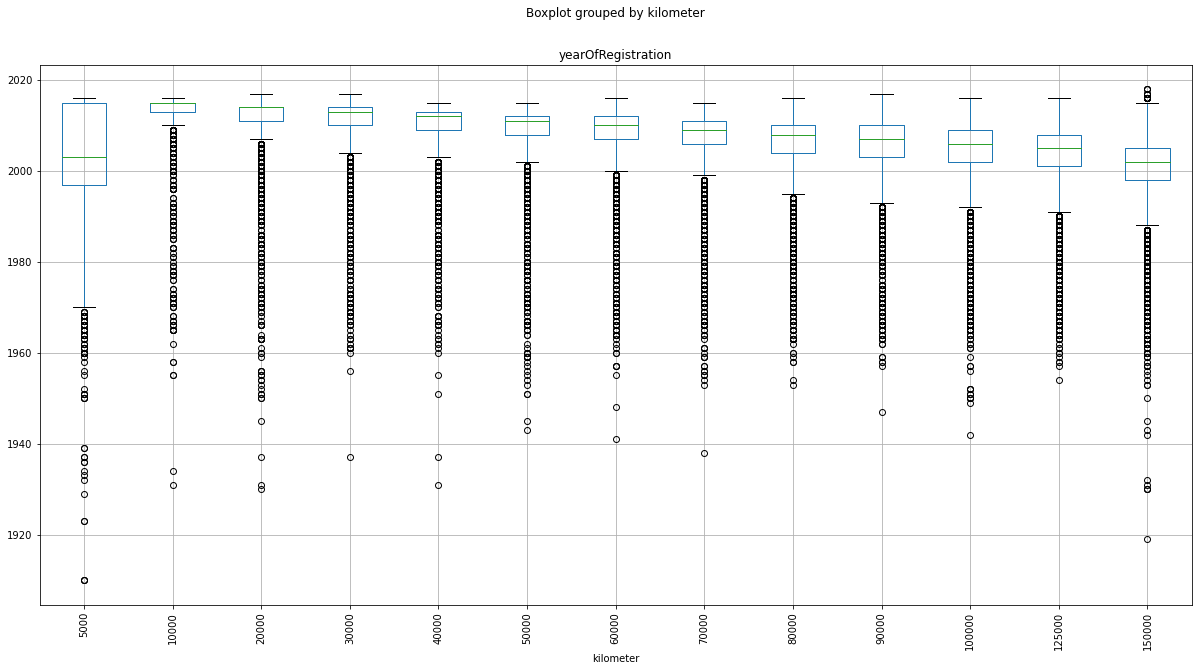

In [27]:
auto.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
auto[numer_columns] = scaler.fit_transform(auto[numer_columns])
auto.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,246385.000000,246385.000000,246385.000000,246385.000000,246385.000000
mean,0.000083,0.863722,0.006318,0.820801,0.514415
std,0.003533,0.060613,0.007437,0.275138,0.289336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000015,0.824074,0.003950,0.655172,0.250000
50%,0.000038,0.870370,0.005800,1.000000,0.500000
75%,0.000087,0.907407,0.007500,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


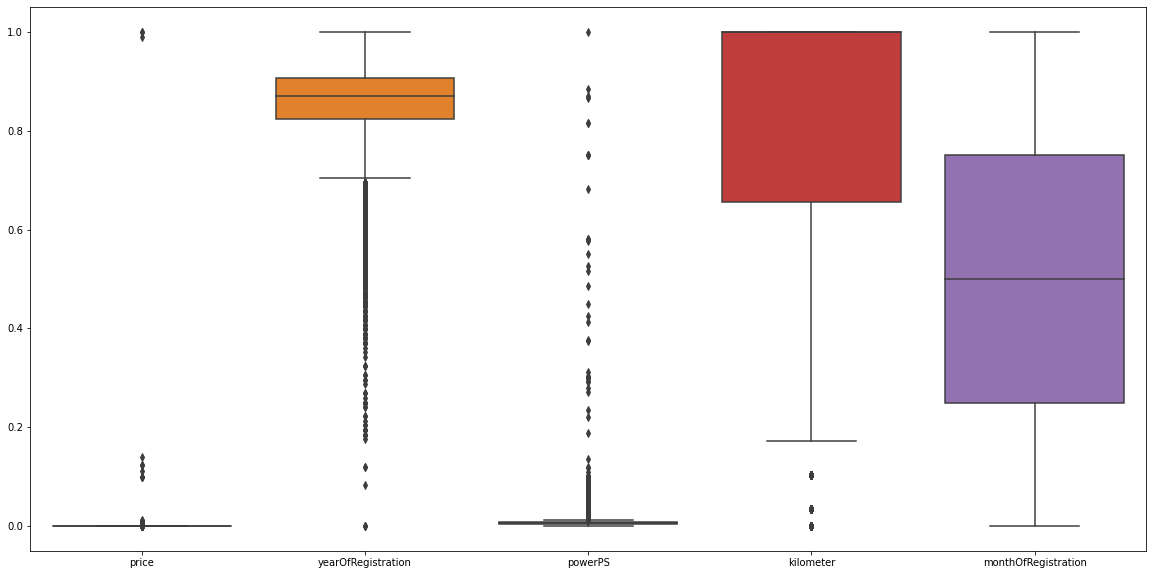

In [29]:
plt.figure(figsize=figsize)
sns.boxplot(data=auto[numer_columns])
plt.show()

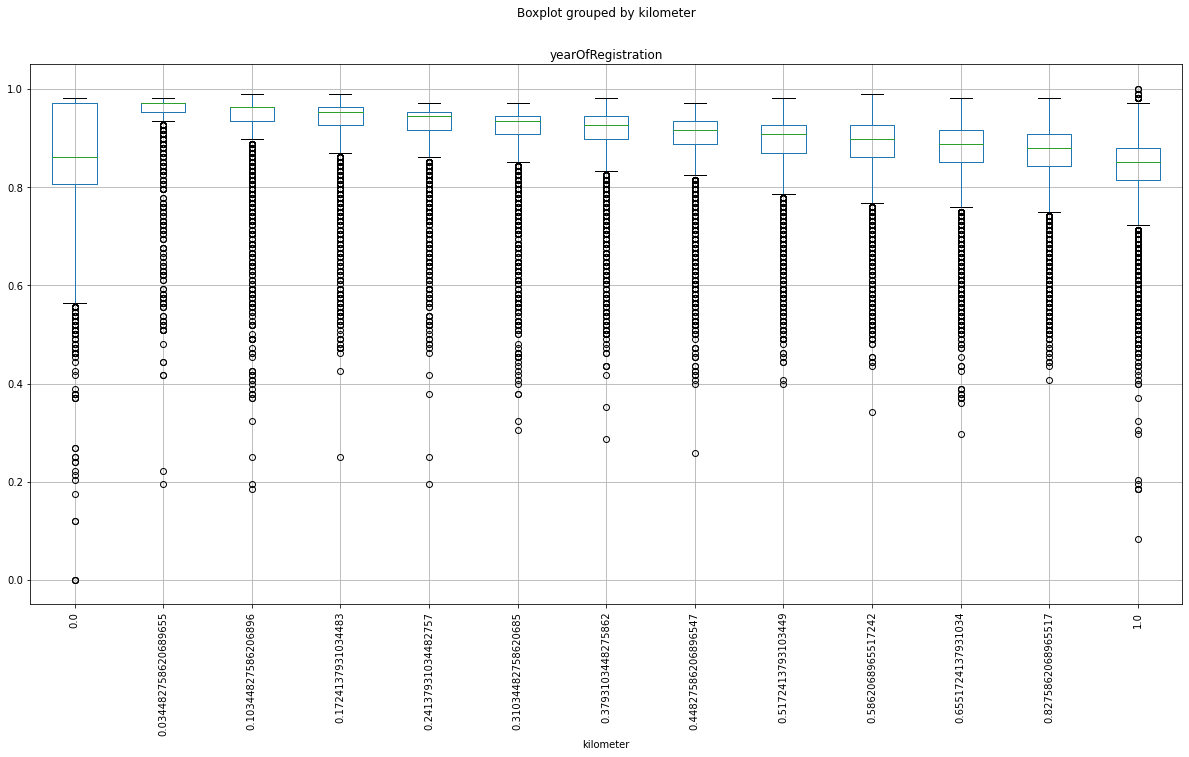

In [30]:
auto.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

### 4 Задание

In [31]:
categor_columns = [i for i in auto.columns if auto[i].dtype.name == 'object']
print("Categorical: " + str(categor_columns))

Categorical: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [32]:
nonbinary = [column for column in categor_columns if len(auto[column].unique()) > 2]

for column in [column for column in categor_columns if len(auto[column].unique()) == 2]:
    for i, unic_item in enumerate(auto[column].unique()):
        auto[column] = auto[column].replace(to_replace=[unic_item], value=[i])

data_nonbinary = pd.get_dummies(auto[nonbinary])
auto.drop(nonbinary, axis=1, inplace=True)
auto = pd.concat([data_nonbinary, auto] , axis=1)
auto

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,brand_volvo,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0
5,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1
6,0,0,1,0,0,0,0,0,0,1,...,0,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000032,1,0.870370,0,0.01125,1.000000,0.416667,1
371521,0,1,0,0,0,0,0,0,0,1,...,0,0,0.000012,1,0.833333,0,0.00000,1.000000,0.250000,0
371524,0,0,1,0,0,0,0,0,0,1,...,0,0,0.000012,0,0.833333,1,0.00505,0.827586,0.250000,0
371525,0,1,0,0,0,0,0,0,0,0,...,0,0,0.000092,0,0.796296,0,0.00510,1.000000,0.250000,0


### 5  Задание

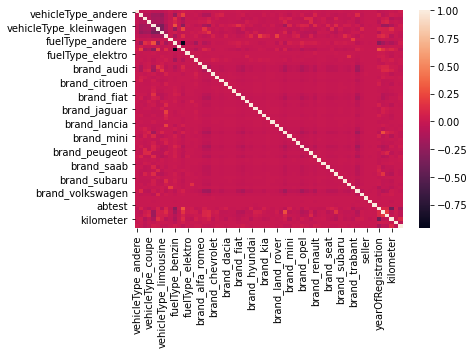

In [33]:
correl = auto.corr()
sns.heatmap(correl)

### 6 Задание

In [34]:
auto.count()

vehicleType_andere        246385
vehicleType_bus           246385
vehicleType_cabrio        246385
vehicleType_coupe         246385
vehicleType_kleinwagen    246385
                           ...  
gearbox                   246385
powerPS                   246385
kilometer                 246385
monthOfRegistration       246385
notRepairedDamage         246385
Length: 63, dtype: int64

#### Пропущенных значений нет

### 7 Задание

In [35]:
data_x, data_y = auto.drop(['price'], axis=1), auto['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)

lasso = Lasso()

In [36]:
params = {'alpha': np.arange(0, 0.1, 0.01)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(train_x, train_y)
best_alpha = lasso_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.0


In [38]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(train_x,train_y)
pred_las = lasso.predict(test_x)
Pirson, p_value_pir = pearsonr(pred_las, test_y)
print("Pearson correlation: ", Pirson)
Spirman, p_value_sp = spearmanr(pred_las, test_y)
print("Spearmen correlation: ", Spirman)
print("P_VALUSE_PIR :", p_value_pir)
print("P_VALUSE_SP :", p_value_sp)
print(pred_las[:15] - test_y[:15])

Pearson correlation:  0.015101849203481066
Spearmen correlation:  0.6664625858655381
P_VALUSE_PIR : 4.02605173561931e-05
P_VALUSE_SP : 0.0
55047    -0.000013
74300     0.000014
26580    -0.000026
198933    0.000010
118142   -0.000039
148869    0.000045
368730    0.000015
59375     0.000053
338033    0.000042
208567    0.000148
4516      0.000047
168315    0.000001
14098    -0.000057
230127    0.000057
4736     -0.000036
Name: price, dtype: float64


In [41]:
rid = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
rid_grid = GridSearchCV(rid, params)
rid_grid.fit(train_x, train_y)
best_alpha = rid_grid.best_estimator_.alpha
print('Лучшее значение альфа:', best_alpha)

Лучшее значение альфа: 2.95


In [43]:
rid = Ridge(alpha=best_alpha)
rid.fit(train_x,train_y)
pred_rid = rid.predict(test_x)
print(pred_rid[:15] - test_y[:15])

55047    -1.177221e-05
74300     1.404210e-05
26580    -2.650997e-05
198933    9.942933e-06
118142   -3.949550e-05
148869    4.552356e-05
368730    1.516252e-05
59375     5.288264e-05
338033    4.182339e-05
208567    1.474676e-04
4516      4.796803e-05
168315    3.952476e-07
14098    -5.686400e-05
230127    5.710777e-05
4736     -3.615268e-05
Name: price, dtype: float64


In [44]:
Pirson, p_value_pir = pearsonr(pred_rid, test_y)
Spirman, p_value_sp = spearmanr(pred_rid, test_y)
print(f"Pearson correlation: {Pirson} p_value: {p_value_pir}\nSpearman correlation: {Spirman} p_value: {p_value_sp}")

Pearson correlation: 0.015133855148456794 p_value: 3.877127593549248e-05
Spearman correlation: 0.6643025554329892 p_value: 0.0
